# Assignment 3: Landing the rocket
## Y2 Computing (2021/22), weeks 8&ndash;10

In this assignment you are given a uniquely designed rocket ship, represented by a `Rocket` object, and tasked with landing the rocket on a platform floating in the sea. The tasks will lead you through a sequence of steps designed for you to get to know your rocket and to learn how to control it. 

To start, please enter your student ID into the cell below. Your rocket will be generated from your student ID such that no two different IDs will ever create the same rocket.

In [1]:
# Do not alter any of the code within this cell other than the value of studentID
import numpy as np
import matplotlib.pyplot as plt
# Setting global plotting settings
plt.rcParams['font.size'] = 20
plt.rcParams['axes.formatter.useoffset'] = False
from module_engine.assignment import Rocket

# Enter your student ID here
studentID = 0

# Your Rocket object to be used throughout this assignment
my_rocket = Rocket(studentID)  

*** Using a temporary ID. Switch to your own ID as soon as possible. ***



## Introduction
For your new assignment, you have been drafted to help with the rocket development at Space-Z. The executives at Space-Z have been watching many rocket booster landings on Youtube recently and are now pushing for their engineering team to achieve vertical landings for their rockets. Your task will be to develop a simple feedback-control system for the horizontal thrusters to allow the rocket to land on a floating platform. However before you can do that, you will need to familiarise yourself with your rocket and calibrate the thrusters.

For simplicity, we will work in two-dimensional space: the **x** coordinate determines the horizontal position of the rocket, while the **y** coordinate determines its altitude above sea level.

### Your rocket
You can interact with your rocket by calling methods of the `my_rocket` object. 

Real-time interaction:
 - You can apply horizontal thrust by using the **advance** method: `.advance(left_thrust, right_thrust)` will apply `left_thrust` and `right_thrust` during a time interval which is always **1/60 s long**. The function returns a NumPy array with three values. The first two values are the **x** and **y** positions of the rocket. If the third value is not 0, the rocket has left the simulated space and has to be reset, see below. The simulation does not continue outside of the `advance` method. Therefore, by calling the `advance` method repeatedly, you can perform a flight or landing simulation step-by-step.
 
Utility functions:
 - `.reset('space'/'drop')` returns your rocket to its starting position and initial conditions. The reset function can be called with the parameters `space` to perform tests without gravity, or `drop` to attempt landings on the floating platform.
 - `.get_platform_pos()` returns the current **x** position of the floating platform.
 - `.get_flight_data()` can be called **after** a completed simulation, it returns the data recorded during the flight in the form of a two-dimensional NumPy array, with each row being an array of three values: `[t, x, y]`. Here `x` and `y` refer to the rocket position at a time `t` after the start of the flight.

## Training space

This is our first attempt at moving our rocket around. We are putting it into a training space by called `.reset('space')` to start. Then we use  `while` loops to call the `.advance` function repeatedly. Afterwards we request the flight data and plot the recorded rocket positions. Note that we must use the **left** thruster to move to the right (towards positive **x** values), and **right** thruster to move to the left.

In [2]:
N = 0           # Step counter
Nmax = 300      # Number of tracking steps of 1/60 s duration
thrust = 2000.0 # A random test thrust

my_rocket.reset('space')
# Apply right thrust for a while
while N<Nmax:
    N+=1
    pos = my_rocket.advance(0.0,thrust)
# Now apply left thrust
N=0
while N<2*Nmax:
    N+=1
    pos = my_rocket.advance(thrust,0.0)
# Apply right thrust again
N=0
while N<Nmax:
    N+=1
    pos = my_rocket.advance(0.0,thrust)

track = my_rocket.get_flight_data()

Now we can plot the horizontal (**x**) position of the rocket:

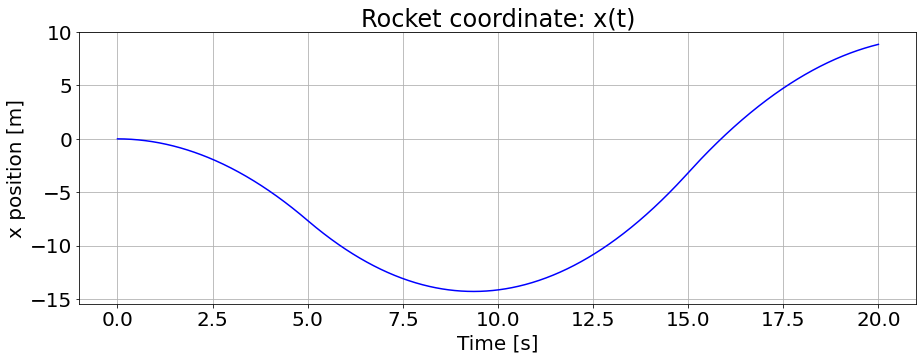

In [3]:
t=track[:,0]
x=track[:,1]
y=track[:,2]

# Plot the x-position as a function of time
fig = plt.figure(figsize=(15,5))
ax = plt.plot(t, x, 'b-')
plt.title('Rocket coordinate: x(t)') 
plt.xlabel('Time [s]') 
plt.ylabel('x position [m]')
plt.grid()
plt.show()

From the position information we can compute horizontal velocity and acceleration:

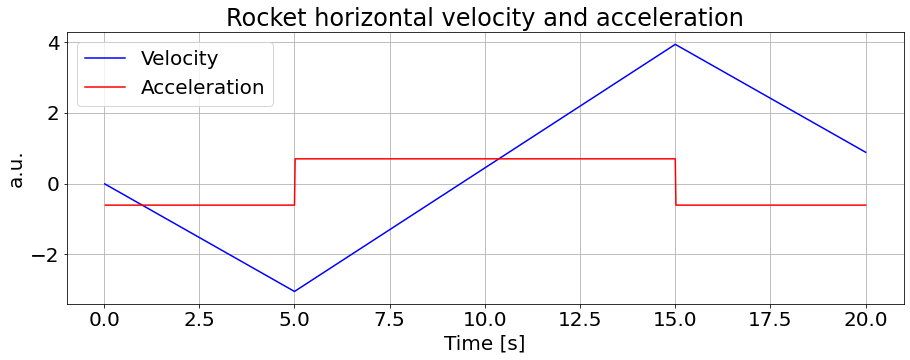

In [4]:
# Compute the speed and acceleration of our rocket
v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig = plt.figure(figsize=(15,5))
# Plot velocity and acceleration as a function of time
plt.plot(t[1:],v, 'b-', label='Velocity')
plt.plot(t[2:],a, 'r-', label='Acceleration')
plt.title('Rocket horizontal velocity and acceleration') 
plt.xlabel('Time [s]') 
plt.ylabel('a.u.')
plt.grid()
plt.legend()
plt.show()

## Calibration
We can see from the above test that we need to calibrate the rocket thrusters. We used the same numerical value for the input arguments `left_thrust` and `right_thrust` in `advance`, however the result shows different numerical values for the resulting acceleration. This means that the actual thrust is not equal to the numerical value requested via the `advance` function. Let's assume that the acceleration of the rocket from the thrust $F$ requested from each thruster is given by the following formula:

$$a(F) = \left\{\begin{align}(F-F_0)/m& \qquad \text{for} ~~~ 0<F-F_0<F_{\rm max};\\
F_{\rm max}/m & \qquad \text{for} ~~~ F-F_0\ge F_{\rm max};\\
0 & \qquad {\rm for} ~~~ F\le F_0.
\end{align}\right.$$

Here
 - $F>0$ is the requested thrust [N];
 - $F_0>0$ is an offset between requested thrust and applied thrust [N];
 - $F_{\rm max}>0$ is a maximum level for achievable thrust [N];
 - $m$ is the mass of the rocket [kg].

The offset parameter $F_0$ is different for each of the two thrusters, while the maximum thrust parameter $F_{\rm max}$ is equal for the two thrusters. The numerical values of the parameters $F_0$, $F_{\rm max}$ and $m$ are unknown.

# Task 1: System identification
#### Marks available:  8

In this task you are asked to use the `space` mode with your rocket to calibrate your thrusters. Please perform one or several experiments with your rocket to find the offset value $F_0$ for each thruster, as well as the values of the maximum thrust $F_{\rm max}$ and the rocket mass $m$. This is another example of *system identification* encountered in assignment 2, however we can use the time domain data directly without considering the frequency domain.

Interact with your rocket to obtain the numerical values for $F_0$, $F_{\rm max}$ and $m$ with the following accuracy:
 - rocket mass $m$: within 1 kg;
 - offets for the left and right thrusters, $F_0^{\rm left}$ and $F_0^{\rm right}$: within 1 N;
 - maximum thrust $F_{\rm max}$: within 10 N.

You can make any number of experiments with your rocket. You can remove (or leave blank) some of the three code cells below, or create additional code cells. The results should be input into the final code cell of Task 1. 

In [5]:
# Useful constants and functions
# ==============================

dt = 1/60

def plot_flight(track, title=None):
    
    t, x, y = track.T

    v = np.diff(x)/np.diff(t)
    a = np.diff(v)/np.diff(t)[1:]

    fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)

    axs[0].plot(t, x)

    axs[1].plot(t[1:], v, label='Velocity')
    axs[1].plot(t[2:], a, label='Acceleration')
    
    if title is not None:
        axs[0].set_title(title)

    axs[0].set_ylabel('x position [m]')
    axs[1].set_ylabel('a.u.')
    axs[1].set_xlabel('Time [s]') 

    axs[1].legend()

    axs[0].grid()
    axs[1].grid()

In [6]:
# Thruster offsets
# ================

# Gradually increase the thrust until the rocket start to move. This tells you 
# the offset.


# Left thruster
# -------------

my_rocket.reset('space')

# Set thrust, F, and position, x, to zero
F = 0
x = 0

# Increase thrust until the rocket moves
while x == 0:
    F += 0.1
    x, y, status = my_rocket.advance(F, 0.0)

o_left = F
print(f'Offset for left thruster = {o_left} N')


# Right thruster
# --------------

my_rocket.reset('space')

F = 0
x = 0

while x == 0:
    F += 0.1
    x, y, status = my_rocket.advance(0.0, F)

o_right = F
print(f'Offset for right thruster = {o_right} N')

Offset for left thruster = 488.1000000000425 N
Offset for right thruster = 679.500000000086 N


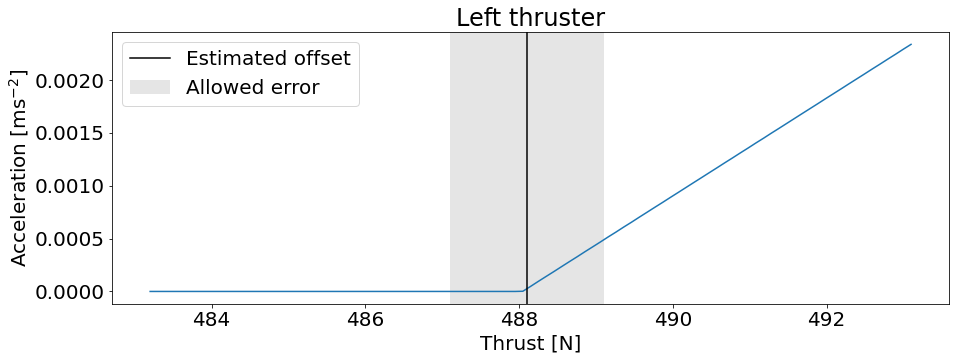

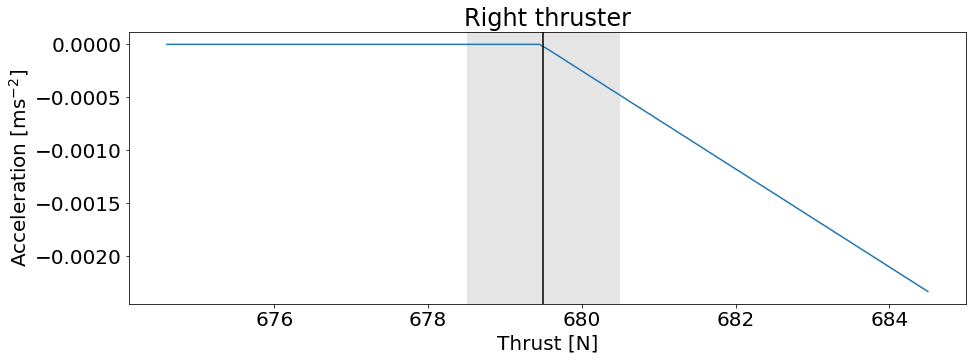

In [7]:
# Plot to check

# Plot the rocket acceleration as a function of thrust. We should see the 
# acceleration start increasing when the offset is reached.

# Left thruster
# -------------

my_rocket.reset('space')

# The thrusts to use on teh x-axis
F_array = np.linspace(o_left-5, o_left+5, 100)

for F in F_array:
    pos = my_rocket.advance(F, 0.0)

# Get flight data and plot

track = my_rocket.get_flight_data()

t, x, y = track.T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig = plt.figure(figsize=(15,5))

plt.plot(F_array[1:], a)

plt.axvline(o_left, color='k', label='Estimated offset')
plt.axvspan(o_left-1, o_left+1, facecolor='k', alpha=0.1, label='Allowed error')

plt.title('Left thruster')
plt.xlabel('Thrust [N]')
plt.ylabel(r'Acceleration [$\mathrm{ms}^{-2}$]')

plt.legend()

plt.show()


# Right thruster
# -------------

my_rocket.reset('space')

F_array = np.linspace(o_right-5, o_right+5, 100)

for F in F_array:
    pos = my_rocket.advance(0.0, F)
    
track = my_rocket.get_flight_data()

t, x, y = track.T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig = plt.figure(figsize=(15,5))

plt.plot(F_array[1:], a)

plt.axvline(o_right, color='k')
plt.axvspan(o_right-1, o_right+1, facecolor='k', alpha=0.1)

plt.title('Right thruster')
plt.xlabel('Thrust [N]')
plt.ylabel(r'Acceleration [$\mathrm{ms}^{-2}$]')

plt.show()

In [8]:
# Rocket mass
# ===========

# If we apply a thrust F' > F_0 for some duration of time, the rocket will 
# accelerate at (F' - F_0)/m. This can be re-arranged for the mass. We should
# find the same mass for each thruster.

# Apply the thrust for 1 second
Nmax = 1/dt


# Left thruster
# -------------

my_rocket.reset('space')

# Thrust to apply
F = 100 + o_left

# Reset the step counter
N = 0

# Perform flight
while N < Nmax:
    N += 1
    pos = my_rocket.advance(F, 0.0)

# Process
t, x, y = my_rocket.get_flight_data().T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

# The acceleration should be constant throughout the flight
a_average = np.average(a)

# Calculate the rocket mass
m_left = (F-o_left)/a_average
print(f'Mass from using left thruster = {m_left} kg')


# Right thruster
# --------------

my_rocket.reset('space')

# Thrust to apply
F = 100 + o_right

# Reset the step counter
N = 0

# Perform flight
while N < Nmax:
    N += 1
    pos = my_rocket.advance(0.0, F)

# Process
t, x, y = my_rocket.get_flight_data().T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

# The acceleration should be constant throughout the flight
a_average = abs(np.average(a))

# Calculate the rocket mass
m_right = (F-o_right)/a_average
print(f'Mass from using right thruster = {m_right} kg')

Mass from using left thruster = 2163.2438398625277 kg
Mass from using right thruster = 2163.484573812319 kg


In [9]:
# Take an average for the final mass
m = (m_left+m_right)/2

In [10]:
# Maximum Thrust
# ==============

# Gradually increase the thrust until the acceleration stops increasing. Then 
# Fmax is obtained by multiplying this maximum acceleration by the rocket mass.

# Left thruster
# -------------

my_rocket.reset('space')

# Start from the offset as we know the maximum thrust must be greater than 
# this
F = o_left

x_previous = 0
v_previous = 0
a_previous = 0

da = 1

# Increase thrust until the maximum acceleration is reached. The change in 
# acceleration, da, won't be exactly zero due to numerical noise.
while abs(da) > 1e-4:
    
    # Ensure the interval is big enough so that we don't leave the simulated 
    # space
    F += 5
    
    x, y, status = my_rocket.advance(F, 0.0)
    
    dx = x - x_previous
    x_previous = x
    
    v = dx/dt
    dv = v - v_previous
    v_previous = v
    
    a = dv/dt
    da = a - a_previous
    a_previous = a
    
# When the loop exits the acceleration will be at its maximum value
Fmax_left = m_left*a

print(f'Maximum thrust from left thruster = {Fmax_left} N')


# Right thruster
# --------------

my_rocket.reset('space')

F = o_right
x = 0

x_previous = 0
v_previous = 0
a_previous = 0

da = 1

# Increase thrust until the maximum acceleration is reached
while abs(da) > 1e-4:
    
    F += 5
    
    x, y, status = my_rocket.advance(0.0, F)
    
    dx = x - x_previous
    x_previous = x
    
    v = dx/dt
    dv = v - v_previous
    v_previous = v
    
    a = dv/dt
    da = a - a_previous
    a_previous = a
    
Fmax_right = m_right*abs(a)

print(f'Maximum thrust from right thruster = {Fmax_right} N')

Maximum thrust from left thruster = 11052.125960042498 N
Maximum thrust from right thruster = 11053.357437246288 N


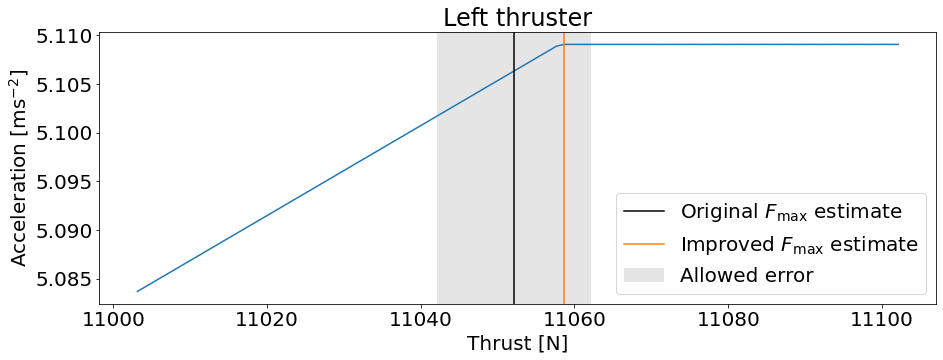

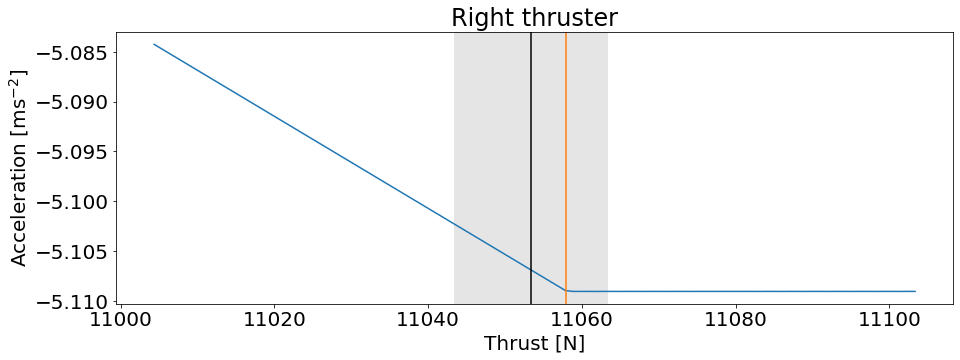

In [11]:
# We can improve these values by choosing values of the thrust closer to Fmax,
# and increasing it with a smaller step size (we couldn't do this before 
# without leaving the simulation space). Then, we can take the value of Fmax 
# directly from the thrust used instead of calculating it with the mass.


# Left thruster
# -------------

my_rocket.reset('space')

# Create a array of thrust values centered on our previous result
F_array = np.linspace(Fmax_left+o_left-50, Fmax_left+o_left+50, 100)

for F in F_array:
    pos = my_rocket.advance(F, 0.0)
    
t, x, y = my_rocket.get_flight_data().T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

# Where the acceleration stops increasing tells us Fmax
Fmax_index = np.where(abs(np.diff(a)) < 1e-4)[0][0]
Fmax_left_improved = (F_array[1:]-o_left)[Fmax_index]

# Plot to check
fig = plt.figure(figsize=(15,5))

plt.plot(F_array[1:]-o_left, a)

# Previous result (with allowed error)
plt.axvline(Fmax_left, color='k', label=r'Original $F_\mathrm{max}$ estimate')
plt.axvspan(Fmax_left-10, Fmax_left+10, facecolor='k', alpha=0.1, label='Allowed error')

# Improved result
plt.axvline(Fmax_left_improved, color='C1', label=r'Improved $F_\mathrm{max}$ estimate')

plt.title('Left thruster')
plt.xlabel('Thrust [N]')
plt.ylabel(r'Acceleration [$\mathrm{ms}^{-2}$]')

plt.legend()

plt.show()


# Right thruster
# --------------

my_rocket.reset('space')

F_array = np.linspace(Fmax_right+o_right-50, Fmax_right+o_right+50, 100)

for F in F_array:
    pos = my_rocket.advance(0.0, F)
    
t, x, y = my_rocket.get_flight_data().T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

Fmax_index = np.where(abs(np.diff(a)) < 1e-4)[0][0]
Fmax_right_improved = (F_array[1:]-o_right)[Fmax_index]

fig = plt.figure(figsize=(15,5))

plt.plot(F_array[1:]-o_right, a)

plt.axvline(Fmax_right, color='k')
plt.axvspan(Fmax_right-10, Fmax_right+10, facecolor='k', alpha=0.1)

plt.axvline(Fmax_right_improved, color='C1')

plt.title('Right thruster')
plt.xlabel('Thrust [N]')
plt.ylabel(r'Acceleration [$\mathrm{ms}^{-2}$]')

plt.show()

In [12]:
# Take an average for the final maximum thrust
tmax = (Fmax_left_improved+Fmax_right_improved)/2
print(f'Final maximum thrust = {tmax} N')

Final maximum thrust = 11058.297254199948 N


## Task 2: There and stop
#### Marks available:  2

Knowing the thruster calibration, we can move the rocket around in a more precise fashion.

### Using the thruster calibration 
First write two utility functions that make use of the known thruster calibration to compute the thrust required to provide a certain acceleration to the rocket. Each function should accept a NumPy array and return a NumPy array (both of float values).

In [13]:
# Add functions here (do not change the function names!)

def acc2thrust_left(acceleration):
    return m*acceleration + o_left

def acc2thrust_right(acceleration):
    return m*acceleration + o_right

Make sure you test these functions by applying a known acceleration to the rocket, and comparing it to the measured acceleration. This test will not be marked, however you can lose marks in this and the following tasks if the functions are not implemented exactly as requested. After doing an experiment that uses your utility functions, you can make a plot of the difference between the requested and the measured acceleration. Considering the precision required on the thrust offsets, the absolute acceleration errors should be well below 0.001 m/s$^2$.

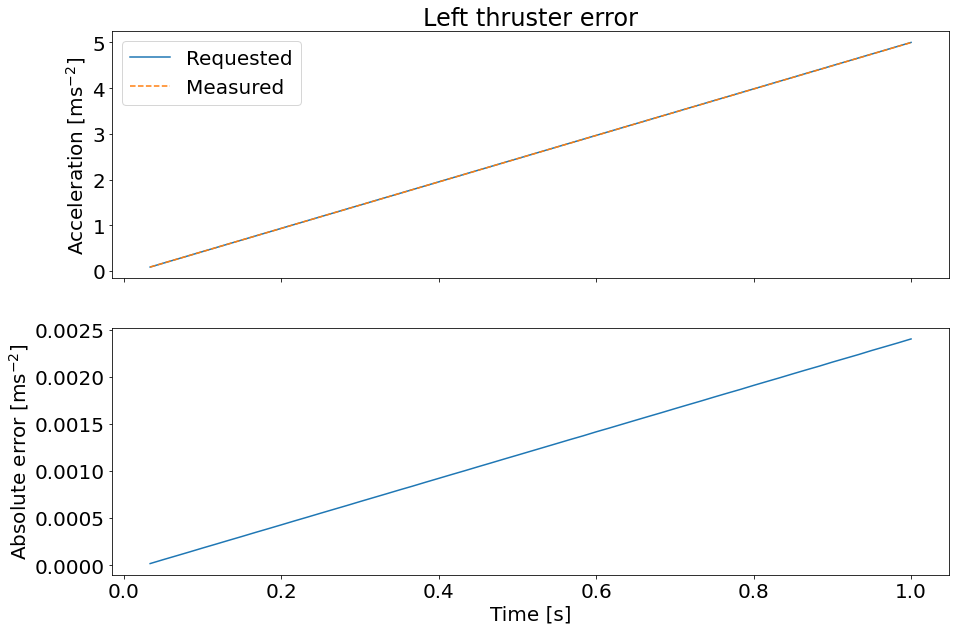

In [14]:
# Test thruster utility functions

# Apply the thrust for 1 second
Nmax = int(1/dt)

# The known accelerations to try
a_array = np.linspace(0, 5, Nmax)


# Left thruster
# -------------

my_rocket.reset('space')

# Perform flight
for a in a_array:
    thrust = acc2thrust_left(a)
    pos = my_rocket.advance(thrust, 0.0)

# Process
t, x, y = my_rocket.get_flight_data().T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)

axs[0].plot(t[2:], a_array[1:], label='Requested')
axs[0].plot(t[2:], a, '--', label='Measured')

axs[1].plot(t[2:], abs(a_array[1:]-a))

axs[0].legend()

axs[0].set_title('Left thruster error')
axs[0].set_ylabel(r'Acceleration [$\mathrm{ms}^{-2}$]')
axs[1].set_ylabel(r'Absolute error [$\mathrm{ms}^{-2}$]')
_ = axs[1].set_xlabel('Time [s]')

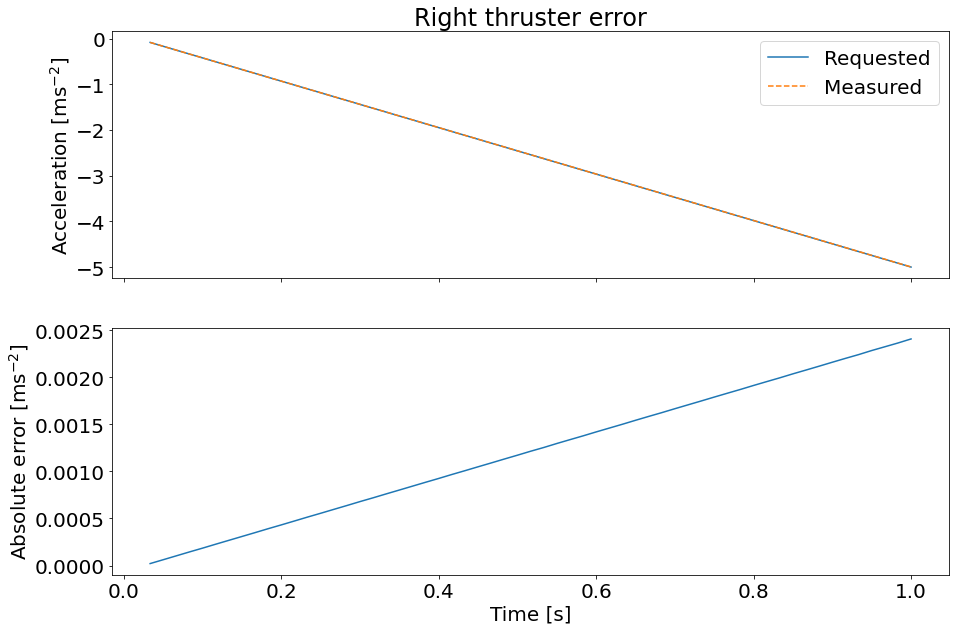

In [15]:
# Right thruster
# --------------

my_rocket.reset('space')

# Perform flight
for a in a_array:
    thrust = acc2thrust_right(a)
    pos = my_rocket.advance(0.0, thrust)

# Process
t, x, y = my_rocket.get_flight_data().T

v = np.diff(x)/np.diff(t)
a = np.diff(v)/np.diff(t)[1:]

fig, axs = plt.subplots(2, 1, figsize=(15,10), sharex=True)

axs[0].plot(t[2:], -a_array[1:], label='Requested')
axs[0].plot(t[2:], a, '--', label='Measured')

axs[1].plot(t[2:], abs(-a_array[1:]-a))

axs[0].legend()

axs[0].set_title('Right thruster error')
axs[0].set_ylabel(r'Acceleration [$\mathrm{ms}^{-2}$]')
axs[1].set_ylabel(r'Absolute error [$\mathrm{ms}^{-2}$]')
_ = axs[1].set_xlabel('Time [s]')

### Moving the rocket with a pre-calculated control sequence
Now make use of your utility functions to move your rocket horizontally in a space without gravity from a starting point with a horizontal coordinate **x=0** to a final point with **x=100 m**. The rocket should stop at the final point. More specifically, the task is to: 
- end the flight at a coordinate within 1 m of the target point x=100 m;
- make sure the rocket **x** coordinate never exceeds 101 m;
- end the flight with the rocket speed not exceeding 0.1 m/s;
- achieve a total flight time below 30 s.

Do not forget to reset your rocket at the start of the code. You are not supposed to use any algorithm to compute the thrust in real time. A full control sequence, in terms of the thrust value at each time step, should be hard-coded in before the flight.

The marking script will evaluate your track data, recorded in the cell below the next one. Make sure that the track data contains the full flight path. Please plot your track to check at least that the rocket arrives at the correct final position within the maximum flight time allowed.

In [16]:
# Your code for 'there and stop'

# We apply left thrust until we reach 50 m. Then, apply the same magntiude 
# right thrust (for the same time). Say we want to reach 50 m in 10 s, use 
# s = 0.5*a*t**2 --> a = 2*s/t**2 = 2*50/(10**2) = 1. 

# Steps required for a 10 s flight
Nmax = 10/dt

my_rocket.reset('space')


# Apply left thrust
# -----------------

# Reset the step counter
N = 0

# Perform flight
while N < Nmax:
    N += 1
    pos = my_rocket.advance(acc2thrust_left(1), 0.0)

    
# Apply right thrust
# ------------------

# Reset the step counter
N = 0

# Perform flight
while N < Nmax:
    N += 1
    pos = my_rocket.advance(0.0, acc2thrust_right(1))

In [17]:
# The following records the track data to be marked.
# Make sure you call reset() before, but not during or after your flight!
student_track1 = my_rocket.get_flight_data()

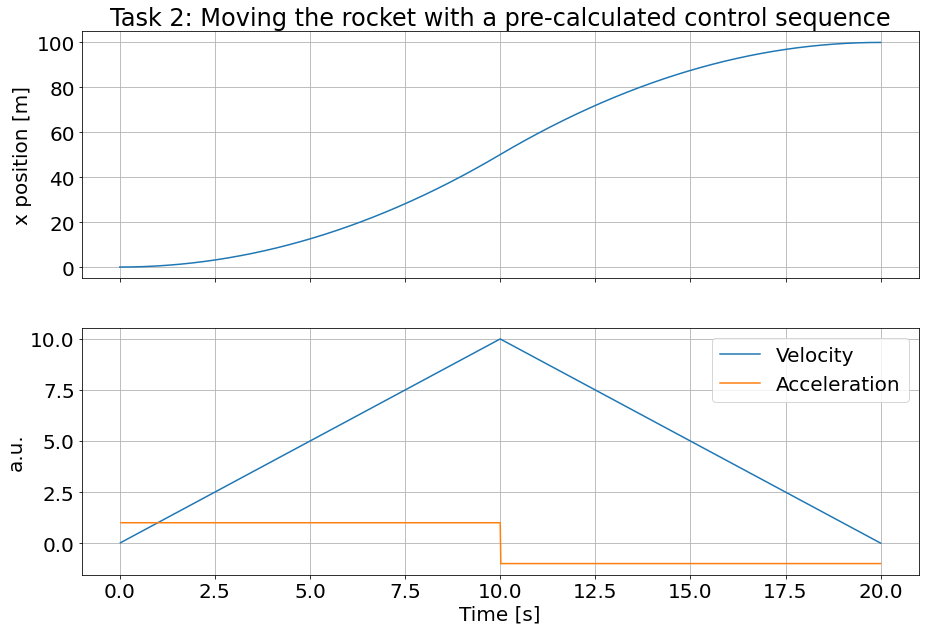

In [18]:
# Cell for plotting the track to check results
plot_flight(student_track1, title='Task 2: Moving the rocket with a pre-calculated control sequence')

## Task 3: Feedback control
#### Marks available:  6

In the task above, we could use our accurate knowledge of the total force acting on the rocket to determine the required thrust for the entire duration flight in advance. However the final task of landing the rocket will involve side winds and a moving platform, which makes this approach impossible. We will therefore develop a **feedback control system**. Feedback control makes use of real-time information to adjust the parameters. In our case, we will use the horizontal position of the rocket to adjust the thrust. In this task you will develop a feedback algorithm for your rocket.

### Moving there, using feedback
Your task is to move the rocket from a starting point **x=0** to a target position **x=100 m** and keep it there, but now using a feedback system.

A naive approach is to activate the left thruster if the rocket is to the left of the target, and activate the right thruster otherwise. One can set the thrust to be proportional to the distance of the rocket from the target. However this will not work in practice, as this will make the rocket oscillate around the target position. Nevertheless, let's implement an algorithm to verify this.

Write a function that accepts two input arguments: the x-position of the rocket and the target position, and returns two values: `left_thrust` and `right_thrust` to be used with `advance()` method. Your function should compute the thrust such that the rocket acceleration is proportional to the distance from the target, using a code similar to ` acc = gain * (target-pos)`. The `gain` is a scaling factor that you can adjust to control the strength of the feedback. Your function should call the `acc2thrust_left` and `acc2thrust_right` functions defined above.

In [19]:
# Student code for position-based feedback,
# do *not* change the name or arguments of the function.

def position_feedback(pos, target):
    
    # Scaling factor to adjust acceleration strength
    gain = 1
    
    # Acceleration
    a = -gain*(pos-target)
    
    if a > 0:
        left_thrust = acc2thrust_left(a)
        right_thrust = 0
        
    elif a < 0:
        left_thrust = 0
        right_thrust = acc2thrust_right(-a)
        
    else:
        left_thrust = 0
        right_thrust = 0

    return left_thrust, right_thrust

### Oscillation
Test the `position_feedback` function by trying to move the rocket from an inintial position **x=0** to a target position **x=100 m**. Adjust the `gain` parameter in the `position_feedback` function such that you can clearly see the rocket oscillating around the target position during an approximately 60 s long flight. The track of your test is recorded in the cell below next. The track data stored in `student_track2` will be analysed and marked.

In [20]:
# Student code for creating flight path with 
# an oscillation around target

# Steps required for a 60 s flight
Nmax = 60/dt

my_rocket.reset('space')

# Reset the step counter
N = 0

# Initial position
x = 0

# Target position
target = 100

# Perform flight
while N < Nmax:
    
    N += 1
    
    left_thrust, right_thrust = position_feedback(x, target)
    
    x, y, status = my_rocket.advance(left_thrust, right_thrust)

In [21]:
# The following records the track data to be marked, Make sure
# that you do not call `reset()` during or after your flight!
student_track2 = my_rocket.get_flight_data() 

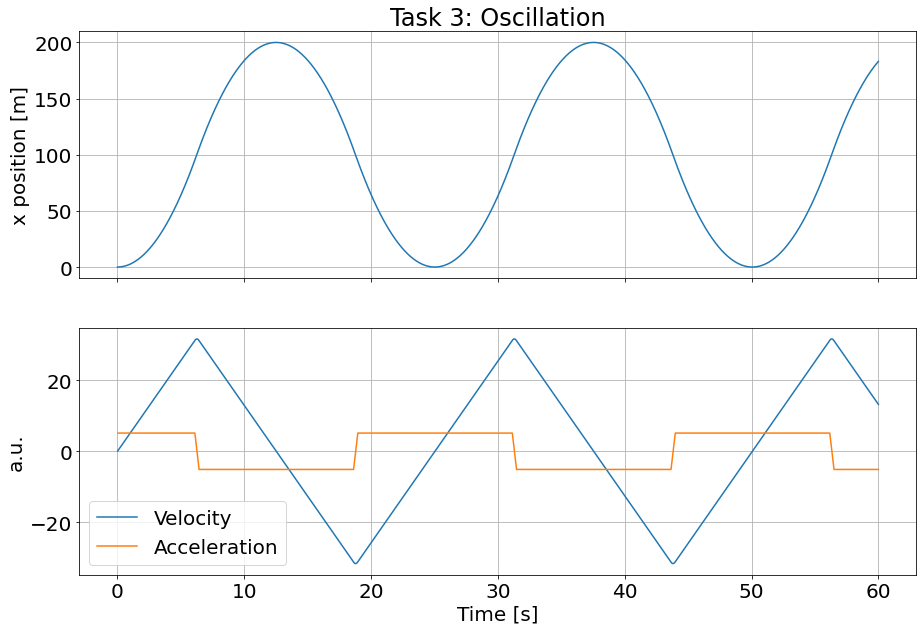

In [22]:
# Cell for plotting the track to check results
plot_flight(student_track2, title='Task 3: Oscillation')

### Damped oscillation 

The above result is not surprising: we have created a system in which a restoring force is proportional to the position (with respect to the target point). The resulting harmonic oscillator will oscillate forever around the target position. This behaviour can be changed by creating a damped oscillator that settles (quickly) at the target position. This can be achieved by using a new function that computes the feedback based on the **position** and **speed** of the rocket.

Write a new feedback function to compute the rocket thrust. This function should accept three input arguments: position, velocity and target position. Internally it should use two gain values, a position gain `pos_gain` and a velocity gain `v_gain`, and return the thrust values as before. 

Adjust the two gains such that the rocket reaches its target quickly and does not overshoot the target by more than 1 meter at any time. Perform a flight and record the track data in the cells below. The track data stored in `student_track3` will be analysed and marked.

In [23]:
# Student code for position and velocity feedback,
# do *not* change the name or arguments of the function.

def damped_feedback(pos, v, target):
    
    # Scaling factors. In the case of critial damping these factors are 
    # related.
    pos_gain = 0.7
    v_gain = 2*np.sqrt(pos_gain)
    
    # Acceleration
    a = -pos_gain*(pos-target) - v_gain*v
    
    if a > 0:
        left_thrust = acc2thrust_left(a)
        right_thrust = 0
        
    elif a < 0:
        left_thrust = 0
        right_thrust = acc2thrust_right(-a)
        
    else:
        left_thrust = 0
        right_thrust = 0
  
    return left_thrust, right_thrust

In [24]:
# Student code to create flight track with damped oscillation

# Steps required for a 60 s flight
Nmax = 60/dt

my_rocket.reset('space')

# Reset the step counter
N = 0

# Initial position
x = 0
x_previous = 0

# Initial velocity
v = 0

# Target position
target = 100

# Perform flight
while N < Nmax:
    
    N += 1
    
    left_thrust, right_thrust = damped_feedback(x, v, target)
    
    x, y, status = my_rocket.advance(left_thrust, right_thrust)
    
    dx = x - x_previous
    x_previous = x
    
    v = dx/dt

In [25]:
# The following records the track data to be marked, Make sure
# that you do not call `reset()` during or after your flight!
student_track3 = my_rocket.get_flight_data() 

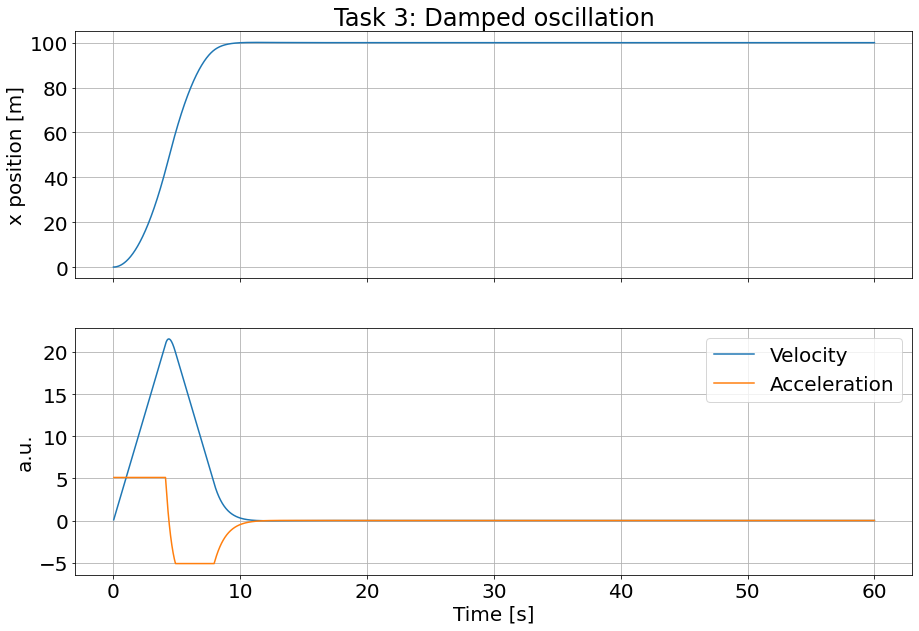

In [26]:
# Cell for plotting the track to check results
plot_flight(student_track3, title='Task 3: Damped oscillation')

## Task 4: Finally, landing the rocket
#### Marks available:  4

We have finally arrived at the real challenge: your rocket starts at **y=2000 m** above the sea level, and your goal is to land it on a floating platform in the sea. Your rocket now operates in a 2D space with **x** being the position along the sea surface, and **y** being the height of the rocket above the sea level.

The platform will change location between each run (upon calling `.reset('drop')`), and will also float sideways during the rocket's descent. The **(x,y)** coordinates of the centre of the platform at any time can be obtained using `my_rocket.get_platform_pos()`. These coordinates should be your target. The horizontal size of the platform is **20 m**, therefore a landing will be deemed successful if the rocket arrives at the sea level within **±10 m** of the centre of the platform. 

The rocket will be accelerated by gravity. In addition, it will be subject to atmospheric drag which lessens the downward acceleration. More importantly, side winds will result in unpredictable horizontal forces. However you are already well equipped with the feedback control system from the previous task, which should handle wind and moving targets without any further adjustments.

The cell below contains a while-loop set up to attempt 40 rocket landings. The call of `my_rocket.reset_flight_counter()` at the start is used to reset the counter of successful flights, and `reset('drop')` at the start of each loop cycle is used to put the rocket into its initial posision. Please add your code to steer the rocket into the while-loop. **Do not change** any other code in the cell below. You should attempt **exactly 40 landings**, and the list called `tracks` should be used to store the 40 flight paths. This is essential to get the correct marks.

It might be difficult to succeed in 100% of your attempts. Full marks will be awarded for successful landing in **75%** of the attempts.

In [27]:
# Your code to land rocket

my_rocket.reset_flight_counter()
Nflights = 40
tracks = []
N = 0

# Saving the platform movement will be useful for plots
platform_tracks = {}

while N < Nflights:
    
    my_rocket.reset('drop')

    # Initial position
    x = 100
    y = 2000
    x_previous = 100

    # Initial (horizontal) velocity
    v = 0
    
    # Initialize a platform track for the Nth flight
    platform_tracks[N] = []

    # Perform flight
    while y > 0:
        
        # Get the platform position. The x coordinate will be our target.
        x_platform, y_platform = my_rocket.get_platform_pos()
        
        platform_tracks[N].append(x_platform)

        left_thrust, right_thrust = damped_feedback(x, v, x_platform)

        x, y, status = my_rocket.advance(left_thrust, right_thrust)

        dx = x - x_previous
        x_previous = x

        v = dx/dt

    tracks.append(my_rocket.get_flight_data())
    N += 1

The rocket lands on the platform.
1 / 1 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
2 / 2 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
3 / 3 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
4 / 4 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
5 / 5 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
6 / 6 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on the platform.
7 / 7 flights have resulted in a successful landing.
Call .reset("drop") before attempting a new flight.

The rocket lands on 

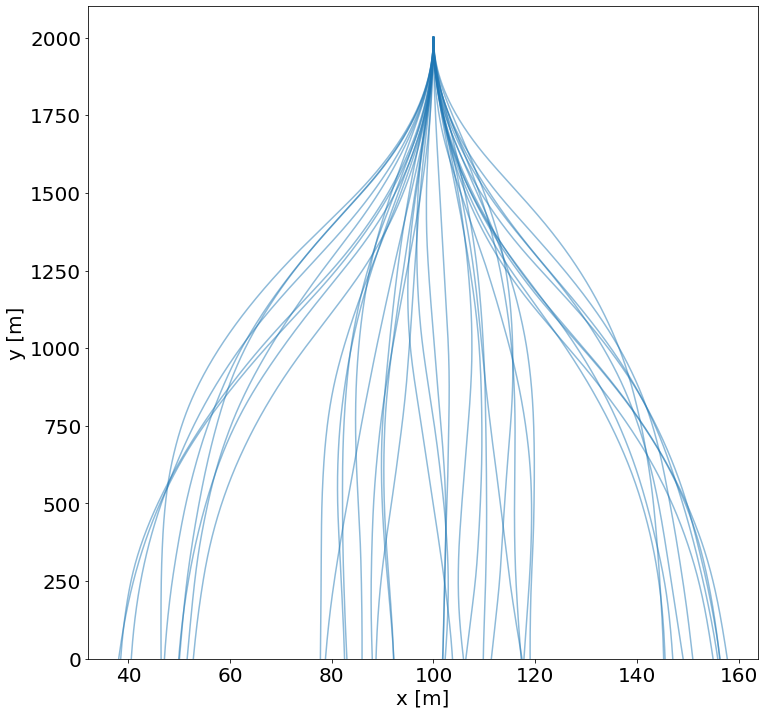

In [28]:
# Student code to plot flight paths 

fig, ax = plt.subplots(figsize=(12,12))

for track in tracks:
    t, x, y = track.T
    ax.plot(x, y, c='C0', alpha=0.5)
    
ax.set_ylim(0)

ax.set_xlabel('x [m]')
_ = ax.set_ylabel('y [m]')

<IPython.core.display.Javascript object>


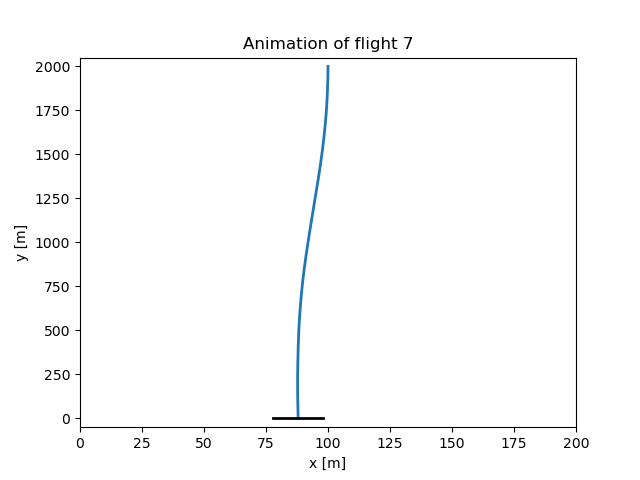

In [29]:
%matplotlib notebook
import matplotlib.animation as animation

# The flight to plot
N_choice = 7

# Get rocket and platform tracks
r_track = tracks[N_choice]
p_track = platform_tracks[N_choice]

fig, ax = plt.subplots()

ax.set_xlim(0,200)
ax.set_ylim(-50,2050)

ax.set_title(f'Animation of flight {N_choice}')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

r_line, = ax.plot([], [], lw=2)
r_xdata, r_ydata = [], []

p_line, = ax.plot([], [], lw=2, c='k')
p_xdata = []

def data_gen():
    for (t, x, y), p_x in zip(r_track, p_track):
        yield x, y, p_x

def run(data):

    x, y, p_x = data
    r_xdata.append(x)
    r_ydata.append(y)

    r_line.set_data(r_xdata, r_ydata)
    p_line.set_data([p_x-10,p_x+10], [0,0])

    return [r_line, p_line]

ani = animation.FuncAnimation(
    fig, 
    run, 
    frames=data_gen, 
    interval=10,
    repeat=False)

plt.show()

In [30]:
# Check how many flights succeeded:
print(my_rocket.successful_landing_counter)

40


# For demonstrators
This example comes with the marking script included. Thus you can check your marks by exectuting the following cell. The students will not get the `marker` code and will *not* be able to do this.

In [31]:
import module_engine.marker as mark
mk=mark.Solution3(studentID)
mk.mark();

Task 1:
 We checked if m, o_left, o_right and tmax where present in your notebook: 'm' was found and has the correct value, 'o_left' was found and has the correct value, 'o_right' was found and has the correct value, 'tmax' was found and has the correct value.
Score: 8/8 

Task 2:
 Your notebook contains `acc2thrust_left' which returned 1 out of 1 correct numerical values for test input data. Your notebook contains `acc2thrust_right' which returned 1 out of 1 correct numerical values for test input data. We found 'student_track1' of the right data type. The data shows that you successfully moved 100 meters to the right without overshooting more than 1 meter, and stopping at the end point (v=0.00m/s).
Score: 2/2 

Task 3:
 Your notebook contains `position_feedback'. The computed thrust is proportional to the distance to target. We found 'student_track2' of the right data type and sufficient size. Your rocket oscillated 5 times around the target position. Your notebook contains `damped_f

Marking student ID 0
*** Using a temporary ID. Switch to your own ID as soon as possible. ***

